# Project Work

In [1]:
# Importing the Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
import math # use math operators
import sqlalchemy as sq # use of sql commands
import plotly.express as px # interactive graphs
import plotly.graph_objects as go # interactive graphs
from plotly.subplots import make_subplots # interactive graphs
import datetime as dt # manipulating date objects

In [2]:
# Importing the COVID-19 dataset for G20 countries, which was previously cleaned:
covid_data = pd.read_csv('g20_covid.csv')

# Importing the financial market indices for G20 countries, converted to USD:
index_data = pd.read_csv('UNION.csv')

This is an initial exploration of the COVID-19 data, particularly analyzing information related to our second guiding question:

#2: Did government and societal healthcare actions influence the prevalence and severity of COVID-19 in G20 countries? Is there a correlation between vaccination, booster-shot, and policy response rates and the prevalence and severity of COVID-19 in the G20 countries?


In [3]:
# Exploratory data wrangling and visualizations...

display(covid_data.head())

display(index_data.head())

covid_data.info()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
1,ARG,South America,Argentina,2020-01-02 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
2,ARG,South America,Argentina,2020-01-03 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
3,ARG,South America,Argentina,2020-01-04 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
4,ARG,South America,Argentina,2020-01-05 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0


,date,Country,USD
0,2018-01-01 0:00,Argentina,0.000000
1,2018-01-02 0:00,Argentina,1671.991824
2,2018-01-03 0:00,Argentina,1711.535940
3,2018-01-04 0:00,Argentina,1732.425964
4,2018-01-05 0:00,Argentina,1729.343505


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    19995 non-null  object 
 1   continent                                   18987 non-null  object 
 2   location                                    19995 non-null  object 
 3   date                                        19995 non-null  object 
 4   total_cases                                 19995 non-null  int64  
 5   new_cases                                   19995 non-null  int64  
 6   new_cases_smoothed                          19995 non-null  float64
 7   total_deaths                                19995 non-null  int64  
 8   new_deaths                                  19995 non-null  int64  
 9   new_deaths_smoothed                         19995 non-null  float64
 10  total_case

In [4]:
# Adding separate year, month, day, and year-month columns to ease future analyses...

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['year'] = covid_data['date'].dt.year
covid_data['month'] = covid_data['date'].dt.month
covid_data['day'] = covid_data['date'].dt.day

covid_data['year-month'] = covid_data['date'].dt.strftime('%Y-%m')

covid_data.head

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 71 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    19995 non-null  object        
 1   continent                                   18987 non-null  object        
 2   location                                    19995 non-null  object        
 3   date                                        19995 non-null  datetime64[ns]
 4   total_cases                                 19995 non-null  int64         
 5   new_cases                                   19995 non-null  int64         
 6   new_cases_smoothed                          19995 non-null  float64       
 7   total_deaths                                19995 non-null  int64         
 8   new_deaths                                  19995 non-null  int64         
 9   new_de

In [5]:
# Displaying average daily deaths per million people for whole dataset:
print('DEATHS:')
display(covid_data['new_deaths_smoothed_per_million'].groupby(covid_data['location']).mean().reset_index())

# Displaying average daily cases per million people for whole dataset:
print('\n\nCASES:')
display(covid_data['new_cases_smoothed_per_million'].groupby(covid_data['location']).mean().reset_index())

DEATHS:


,location,new_deaths_smoothed_per_million
0,Argentina,2.787045
1,Australia,0.582151
2,Brazil,3.292614
3,Canada,1.211217
4,China,0.002702
5,European Union,2.570985
6,France,2.296644
7,Germany,1.820352
8,India,0.368676
9,Indonesia,0.597255




CASES:


,location,new_cases_smoothed_per_million
0,Argentina,208.335850
1,Australia,395.650028
2,Brazil,165.860991
3,Canada,113.011770
4,China,0.708142
5,European Union,384.491345
6,France,544.365507
7,Germany,417.912951
8,India,31.683755
9,Indonesia,24.395625


For answering Guiding Question 2, this section of the report focuses on COVID-19 data for the G20 countries, and specifically took a look at death rates, vaccinations, boosters, and patient data. 

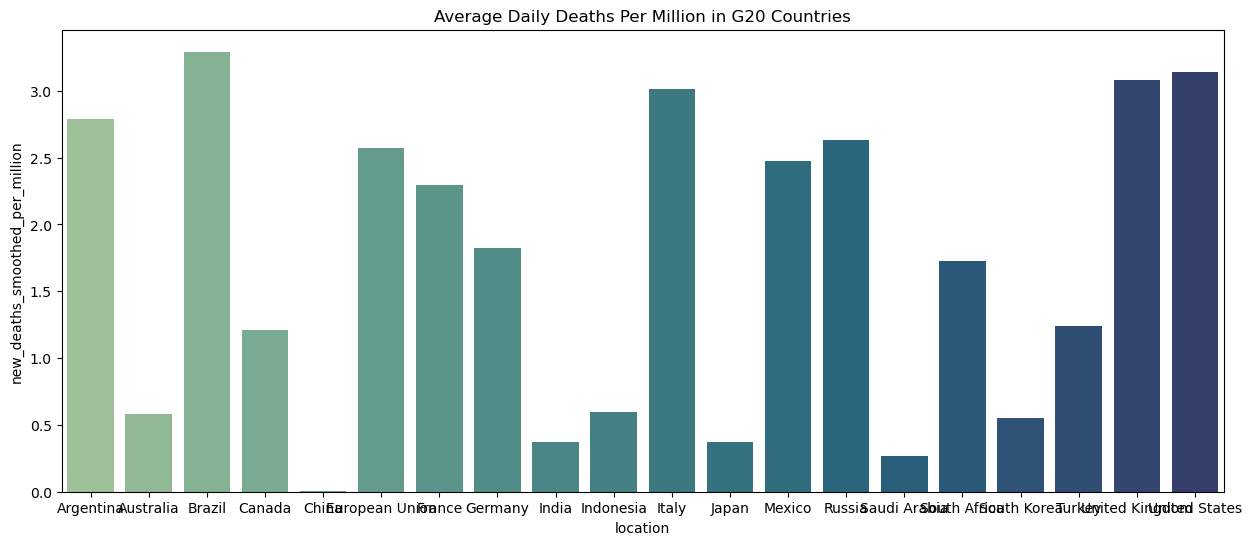

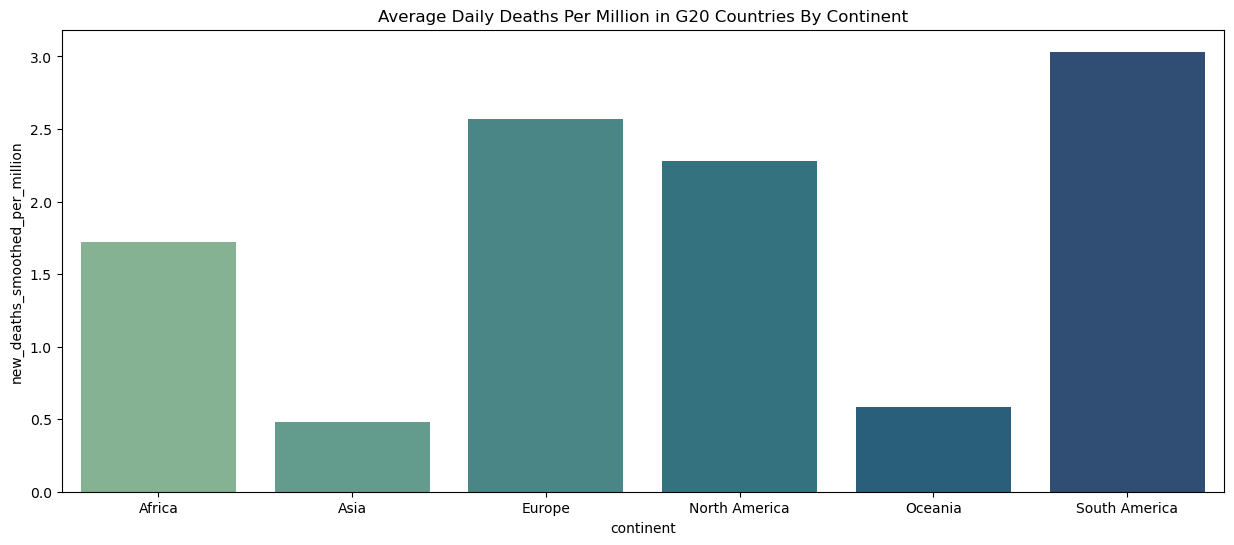

In [6]:
# Analyzing average COVID-19 deaths per country and per continent...

avg_deaths_country = covid_data['new_deaths_smoothed_per_million'].groupby(covid_data['location']).mean().reset_index()

# Plotting average daily deaths per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_deaths_country, x='location', y='new_deaths_smoothed_per_million', palette='crest')
plt.title('Average Daily Deaths Per Million in G20 Countries')
plt.show()


#Per Continent
avg_deaths_cont = covid_data['new_deaths_smoothed_per_million'].groupby(covid_data['continent']).mean().reset_index()

# Plotting average daily cases per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_deaths_cont, x='continent', y='new_deaths_smoothed_per_million', palette='crest')
plt.title('Average Daily Deaths Per Million in G20 Countries By Continent')
plt.show()

From the above 2 bar graphs, an overview of the death counts from COVID-19 is presented. It is observed that the country that had the most deaths was Brazil, followed by Italy and USA closely tied together. When grouping by continents, South America, Europe, and North America come in as the top 3 continents with the most deaths from COVID-19.

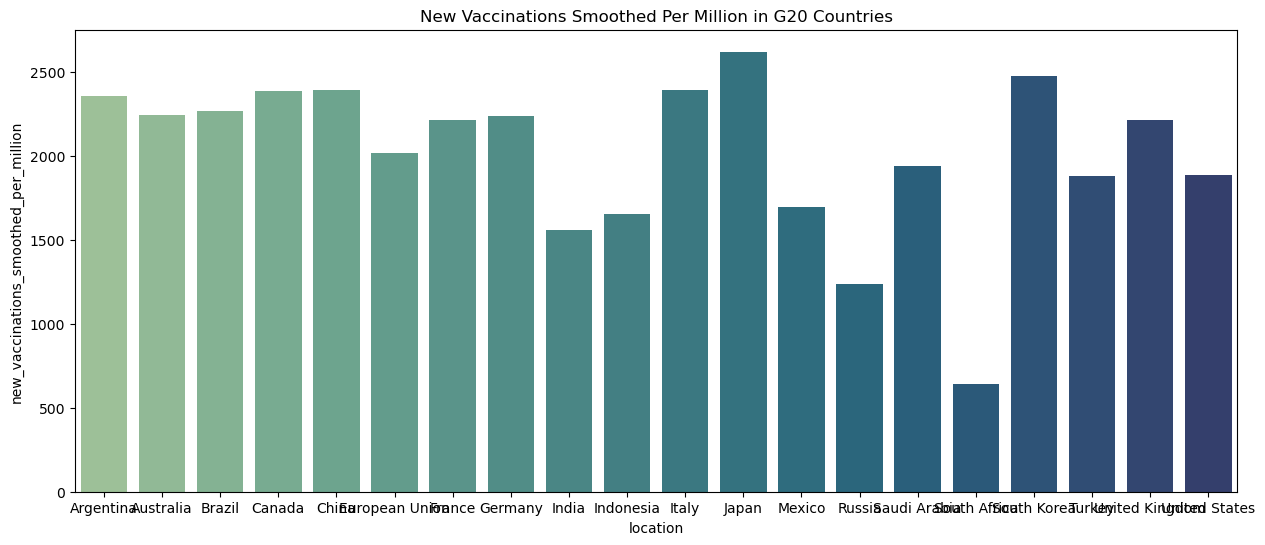

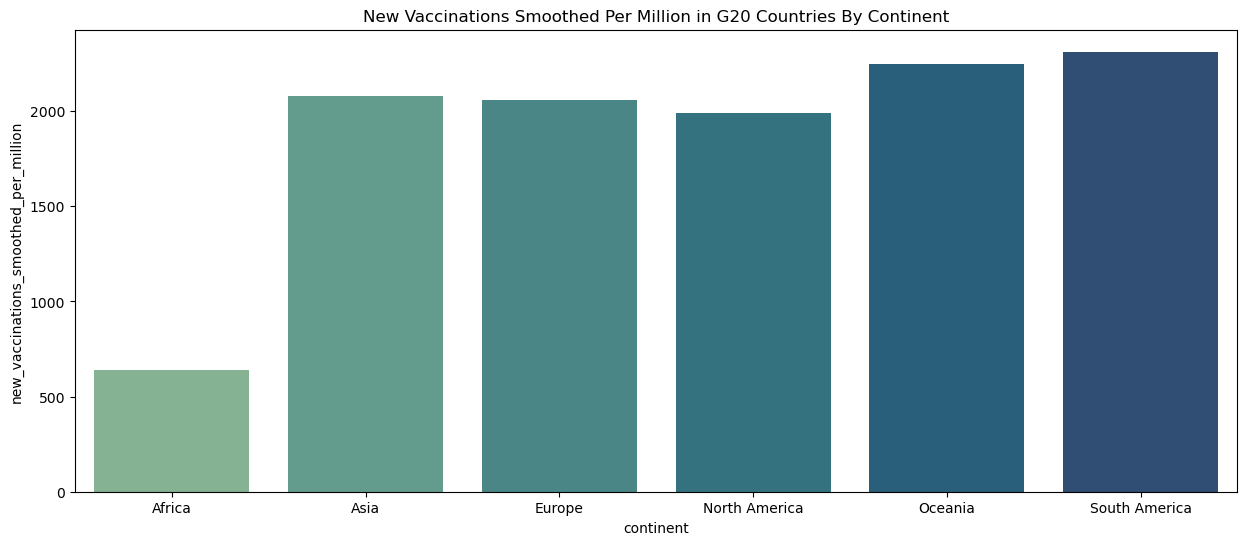

In [7]:
# Analyzing average COVID-19 vaccines per country and per continent...

avg_vaccines_country = covid_data['new_vaccinations_smoothed_per_million'].groupby(covid_data['location']).mean().reset_index()

# Plotting average daily deaths per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_vaccines_country, x='location', y='new_vaccinations_smoothed_per_million', palette='crest')
plt.title('New Vaccinations Smoothed Per Million in G20 Countries')
plt.show()


#Per Continent
avg_vaccines_cont = covid_data['new_vaccinations_smoothed_per_million'].groupby(covid_data['continent']).mean().reset_index()

# Plotting average daily cases per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_vaccines_cont, x='continent', y='new_vaccinations_smoothed_per_million', palette='crest')
plt.title('New Vaccinations Smoothed Per Million in G20 Countries By Continent')
plt.show()

Now taking a look at the amount of new vaccinations smoothed per million, two bar graphs are produced: 1 for countries and 1 for continents. Interestingly, Japan has the highest number of new vaccinations per million, then South Korea. We see from the previous bar graph that both of these countries had a very low death rate, which could possibly be correlated to the vaccine rate. 

Moreover, when analyzing the new vaccinations per million by continent, it is found that South America is the highest, followered by Oceania, and Asia. This is interesting as South America also had the most deaths as determined from the previoius set of bar graphs, implying that vaccinations and death rates may not be as direct of a correlation as initially thought. 

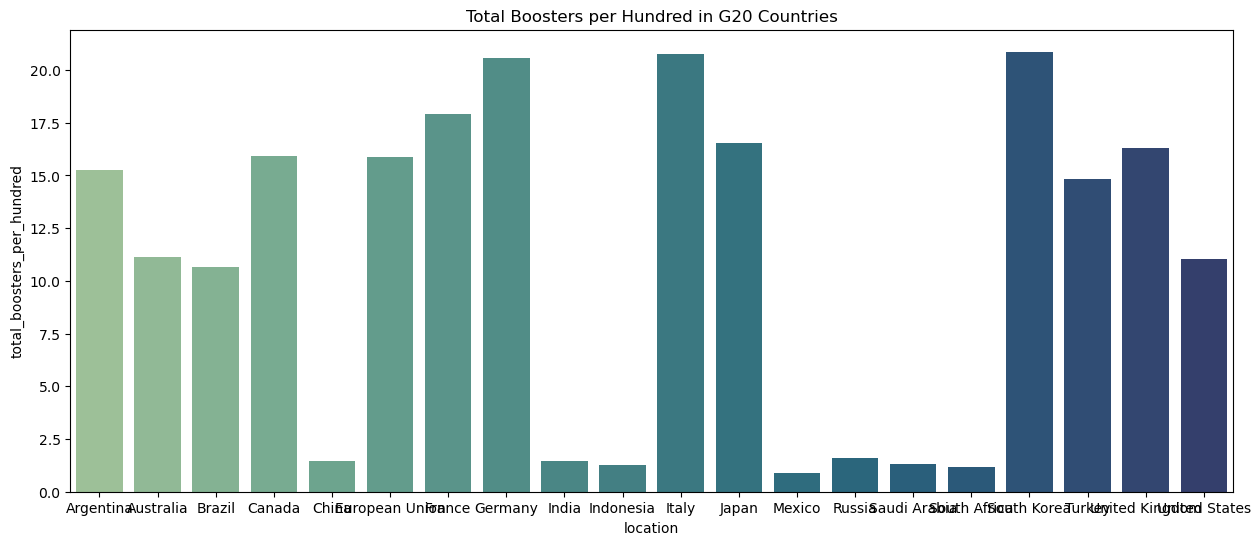

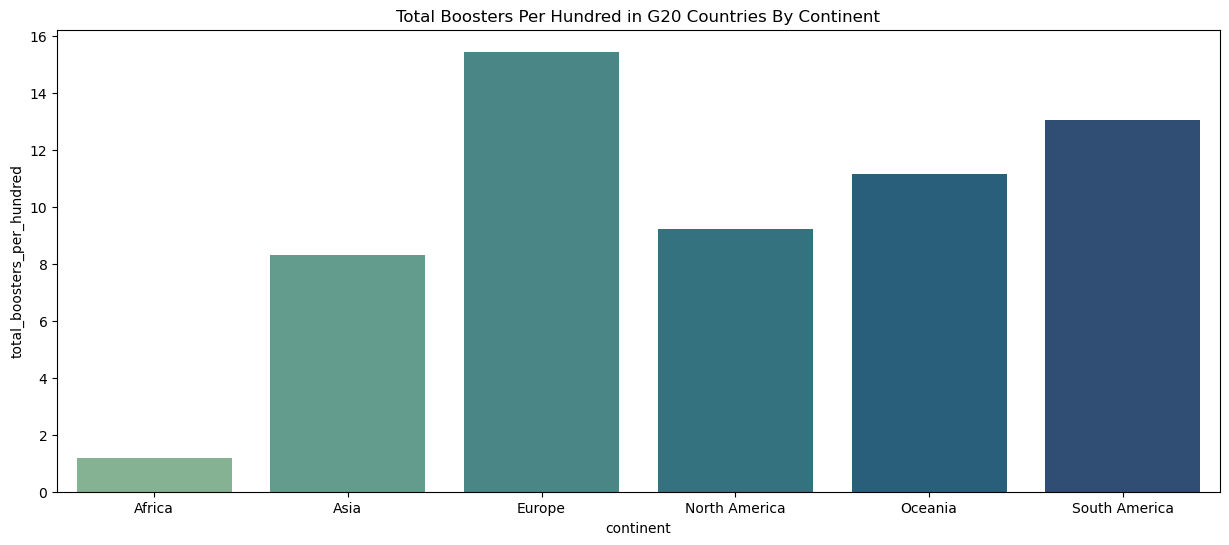

In [8]:
# Analyzing average COVID-19 boosters per country and per continent...

avg_boosters_country = covid_data['total_boosters_per_hundred'].groupby(covid_data['location']).mean().reset_index()

# Plotting average daily deaths per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_boosters_country, x='location', y='total_boosters_per_hundred', palette='crest')
plt.title('Total Boosters per Hundred in G20 Countries')
plt.show()


#Per Continent
avg_boosters_cont = covid_data['total_boosters_per_hundred'].groupby(covid_data['continent']).mean().reset_index()

# Plotting average daily cases per million people in G20 countries for whole dataset:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=avg_boosters_cont, x='continent', y='total_boosters_per_hundred', palette='crest')
plt.title('Total Boosters Per Hundred in G20 Countries By Continent')
plt.show()

The above two bar graphs show the total boosters per hundred grouped by country and continent. Compared to the country bar graph for vaccinations, interestingly the results show difference, instead of being similar. While South Korea had a high rate for boosters, Japan did not have as much of a high rate. Moreover, the continent with the highest rate for getting boosters is Europe, rather than South America. 

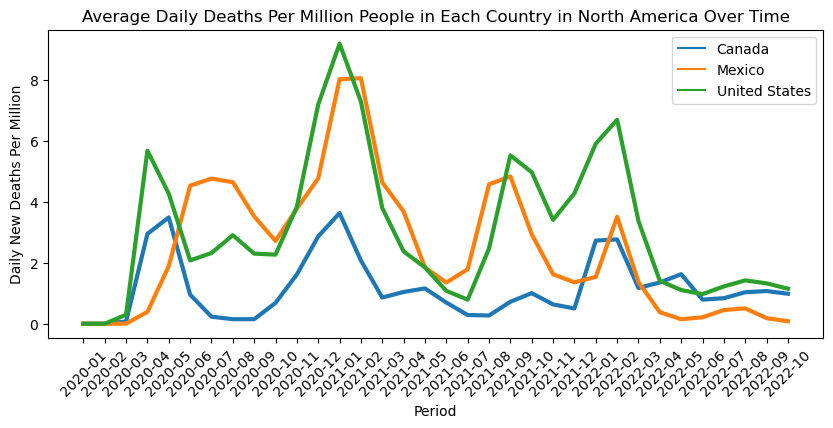

In [9]:
# Displaying COVID-19 Deaths over time for countries in North America:

NA_countries = covid_data[covid_data['continent'] == 'North America']

NA_deaths_over_time = NA_countries['new_deaths_smoothed_per_million'].groupby([NA_countries['location'], NA_countries['year-month']]).mean().reset_index()

# Line plot over the years/months
fig = plt.figure()
fig.set_size_inches(10,4)
p = sns.lineplot(x='year-month', y='new_deaths_smoothed_per_million', hue='location', data=NA_deaths_over_time, linewidth=3.0)
plt.title('Average Daily Deaths Per Million People in Each Country in North America Over Time')
plt.xlabel('Period')
plt.ylabel('Daily New Deaths Per Million')
plt.xticks(rotation=45)
plt.legend()
plt.show()

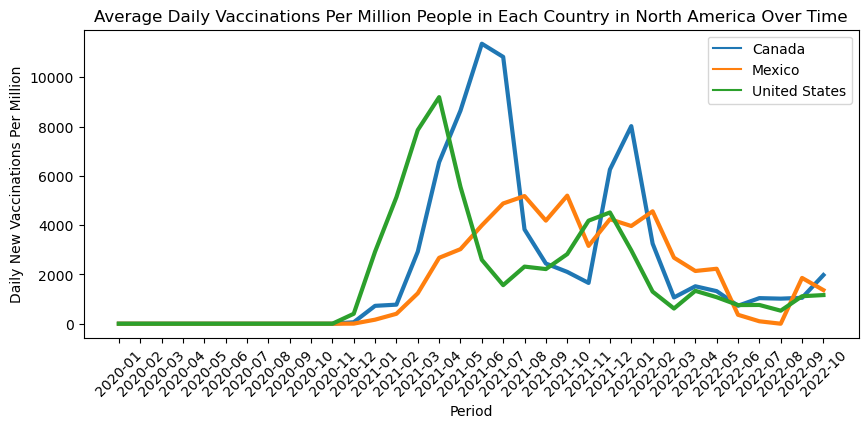

In [10]:
# Displaying new_vaccinations_smoothed_per_million over time for countries in North America:

NA_countries = covid_data[covid_data['continent'] == 'North America']

NA_vaccines_over_time = NA_countries['new_vaccinations_smoothed_per_million'].groupby([NA_countries['location'], NA_countries['year-month']]).mean().reset_index()

# Line plot over the years/months
fig = plt.figure()
fig.set_size_inches(10,4)
p = sns.lineplot(x='year-month', y='new_vaccinations_smoothed_per_million', hue='location', data=NA_vaccines_over_time, linewidth=3.0)
plt.title('Average Daily Vaccinations Per Million People in Each Country in North America Over Time')
plt.xlabel('Period')
plt.ylabel('Daily New Vaccinations Per Million')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Taking a deeper dive into North America’s deaths and vaccinations, we can examine the peaks of deaths from COVID-19 when there were waves of the virus spreading, particularly in March 2020, November 2020, and September 2021. This matches when lockdown measures were implemented in these countries, so the stringency index which is a composite measure based on 9 measures such as school and work closures, and travel bans. Essentially, it has to do with government policies that were enforced surrounding the pandemic restrictions.

/tmp/ipykernel_121/1219294233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada['new_vaccinations_smoothed_per_hundred_thousand'] = ((Canada['new_vaccinations_smoothed'] / Canada['population']) * 100000)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


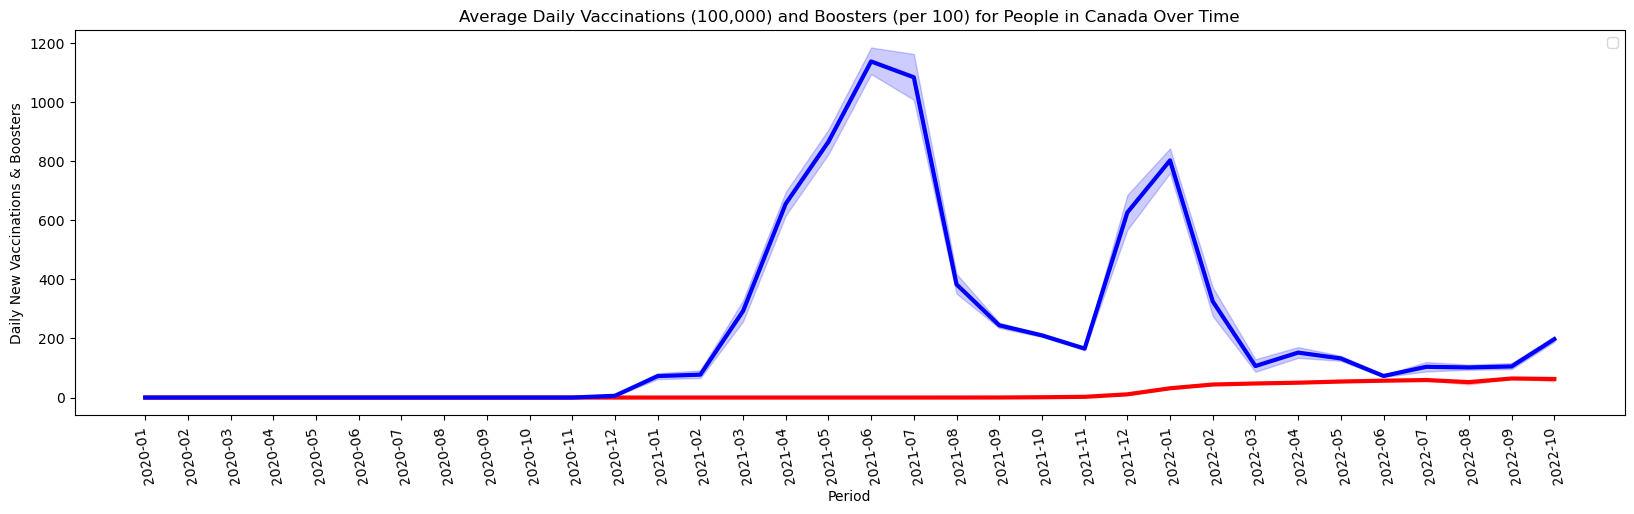

In [11]:
# Displaying vaccinations vs. boosters in Canada

Canada = covid_data[covid_data['location'] == 'Canada']

Canada['new_vaccinations_smoothed_per_hundred_thousand'] = ((Canada['new_vaccinations_smoothed'] / Canada['population']) * 100000)

# Line plot over the years/months
fig = plt.figure()
fig.set_size_inches(20,5)
p = sns.lineplot(x='year-month', y='total_boosters_per_hundred', color='red', data=Canada, linewidth=3.0)
q = sns.lineplot(x='year-month', y='new_vaccinations_smoothed_per_hundred_thousand', color='blue', data=Canada, linewidth=3.0)
plt.title('Average Daily Vaccinations (100,000) and Boosters (per 100) for People in Canada Over Time')
plt.xlabel('Period')
plt.ylabel('Daily New Vaccinations & Boosters')
plt.xticks(rotation=100)
plt.legend(loc=0)
plt.show()

Now analyzing Canada’s vaccinations and boosters, we see that vaccinations had a steep incline around March 2021, which is when the Janssen vaccine was authorized in Canada.

This peaks in May, when the rest of the brand of vaccines became available in Canada, then shoots down for the summer months as many businesses implemented policies to only allow those who had been vaccinated. 

It is interesting we see another peak between January and February 2022.
Compared to the boosters, the rates are significantly lower comparatively, and are less volatile than the vaccine.


/tmp/ipykernel_121/1623701049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada['new_vaccinations_smoothed_per_hundred_thousand'] = ((Canada['new_vaccinations_smoothed'] / Canada['population']) * 100000)


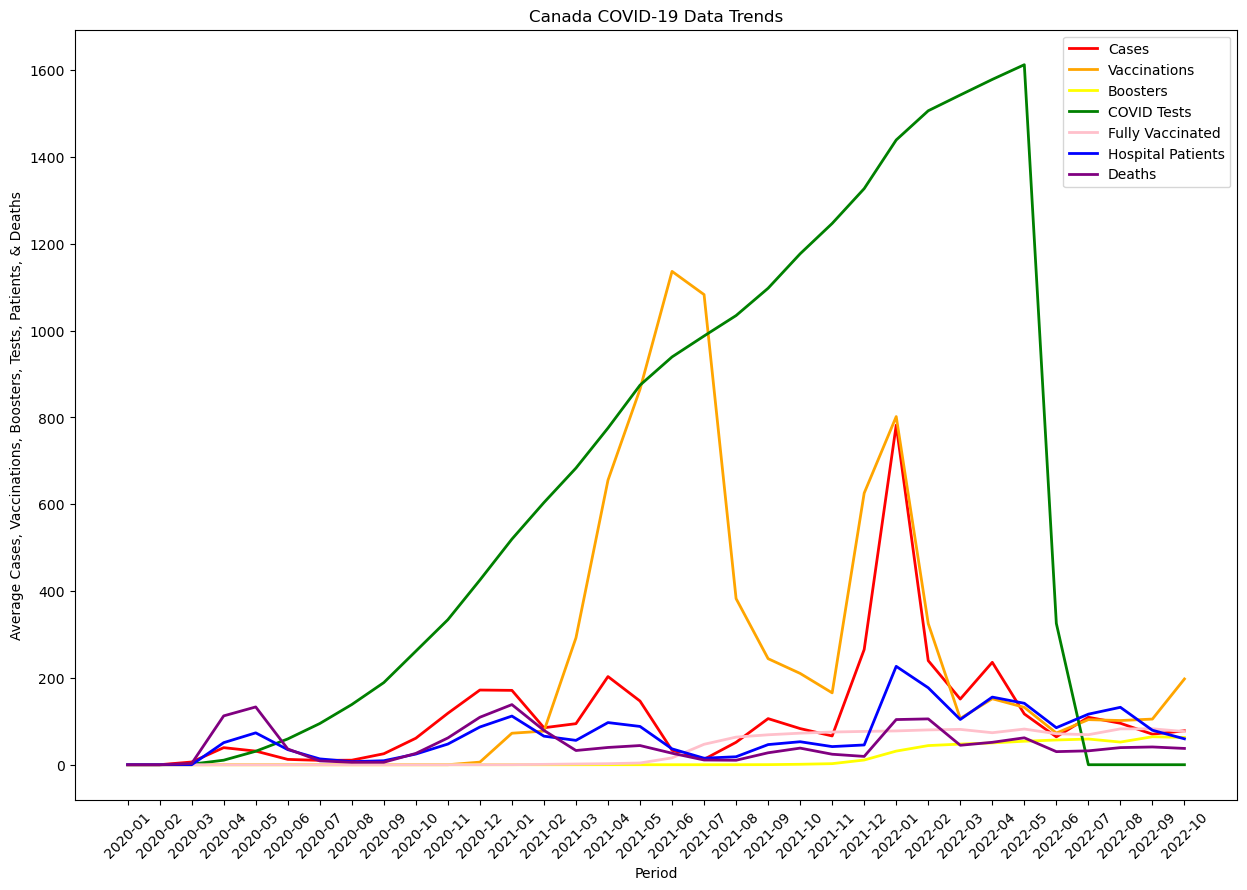

In [14]:
# Displaying covid cases vs. vaccinations in Canada

Canada = covid_data[covid_data['location'] == 'Canada']

Canada['new_vaccinations_smoothed_per_hundred_thousand'] = ((Canada['new_vaccinations_smoothed'] / Canada['population']) * 100000)

Can_cases_over_time = Canada.groupby('year-month').mean().reset_index()

# Line plot over the years/months
fig = plt.figure()
fig.set_size_inches(15,10)
p = sns.lineplot(x='year-month', y='new_cases_smoothed_per_million', color='red', data=Can_cases_over_time, linewidth=2.0, label='Cases')
q = sns.lineplot(x='year-month', y='new_vaccinations_smoothed_per_hundred_thousand', data=Can_cases_over_time, color='orange', linewidth=2.0, label='Vaccinations')
t = sns.lineplot(x='year-month', y='total_boosters_per_hundred', data=Can_cases_over_time, color='yellow', linewidth=2.0, label='Boosters')
u = sns.lineplot(x='year-month', y='total_tests_per_thousand', data=Can_cases_over_time, color='green', linewidth=2.0, label='COVID Tests')
r = sns.lineplot(x='year-month', y='people_fully_vaccinated_per_hundred', data=Can_cases_over_time, color='pink', linewidth=2.0, label='Fully Vaccinated')
v = sns.lineplot(x='year-month', y='hosp_patients_per_million', data=Can_cases_over_time, color='blue', linewidth=2.0, label='Hospital Patients')
s = sns.lineplot(x='year-month', y='new_deaths_smoothed', data=Can_cases_over_time, color='purple', linewidth=2.0, label='Deaths')
plt.title('Canada COVID-19 Data Trends')
plt.xlabel('Period')
plt.ylabel('Average Cases, Vaccinations, Boosters, Tests, Patients, & Deaths')
plt.xticks(rotation=45)
plt.legend(loc=0)
plt.show()

Moving on to analyze more COVID data in Canada, the highest number is COVID-19 tests, which makes sense as a lot of the population was taking tests, but not everyone tested positive, and many were also given at-home test kits. The spike in COVID tests began in mid-2020, and shot up until mid-2022, when there was a significant drop. This could also be due to improper reporting and also due to the huge amount of COVID-cases coming to a close. We can see the red line shows that a drop in cases was observed prior to the testing drop, around the start of 2022.

It is also observed that there was not a fully-vaccinated rate until at least June 2021, again, implying the stringency index may have been at play as many businesses began to implement a "must be vaccinated to enter" policy, as well as travel bans on those who were not fully vaccinated. The increase for people being fully vaccinated may also be indicative of that as it is during the start of summer time, people will tend to leave their house more and in order to do this, they must adhere to the vaccination policies.

There is also an interesting relation between the number of cases, hospitalizations, and deaths. It seems to be very close together. This makes sense of course, as the more cases reported, the more the hospital patient rate increases, as well as the number of deaths.

There are limitations to not only Canada's data, but each country's data, as there could be under-reporting of certain figures and reporting errors. However, with the understanding that this data may not give us the complete, full, most accurate picture of the situation, we are able to extract the general trends of all the COVID variables and begin to make certain connections that will help the team to answer Guiding Question 2.

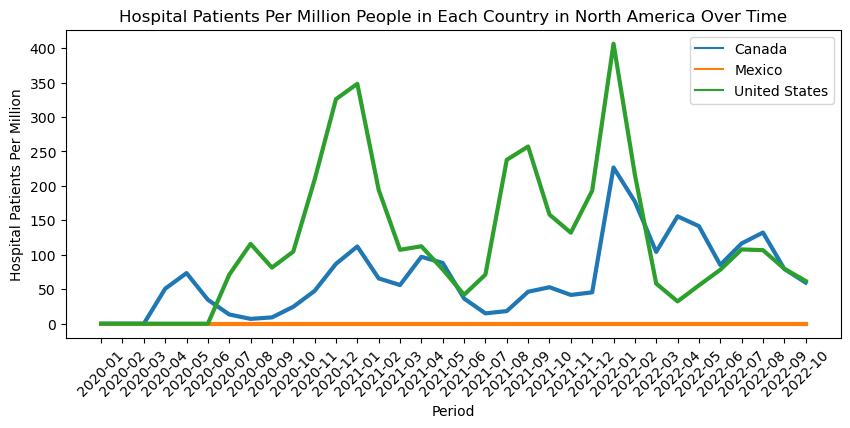

In [15]:
# Displaying COVID-19 Weekly Hospitalizations over time for countries in North America:


NA_countries = covid_data[covid_data['continent'] == 'North America']

NA_hosp_over_time = NA_countries['hosp_patients_per_million'].groupby([NA_countries['location'], NA_countries['year-month']]).mean().reset_index()

# Line plot over the years/months
fig = plt.figure()
fig.set_size_inches(10,4)
p = sns.lineplot(x='year-month', y='hosp_patients_per_million', hue='location', data=NA_hosp_over_time, linewidth=3.0)
plt.title('Hospital Patients Per Million People in Each Country in North America Over Time')
plt.xlabel('Period')
plt.ylabel('Hospital Patients Per Million')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Now taking a look at North America more closely again, the data for hospital patients seems to be fairly inconsistent, and this could be due to a lack of proper reporting procedures, especially for Mexico.

Interestingly, in June 2020, it is observed that the USA has a much higher number of hospitalized patients, while Canada saw a drop. This same pattern once again happens in June 2021, and could imply differences in mandated vaccinations and travel restrictions placed on land and air borders implemented by the two countries.

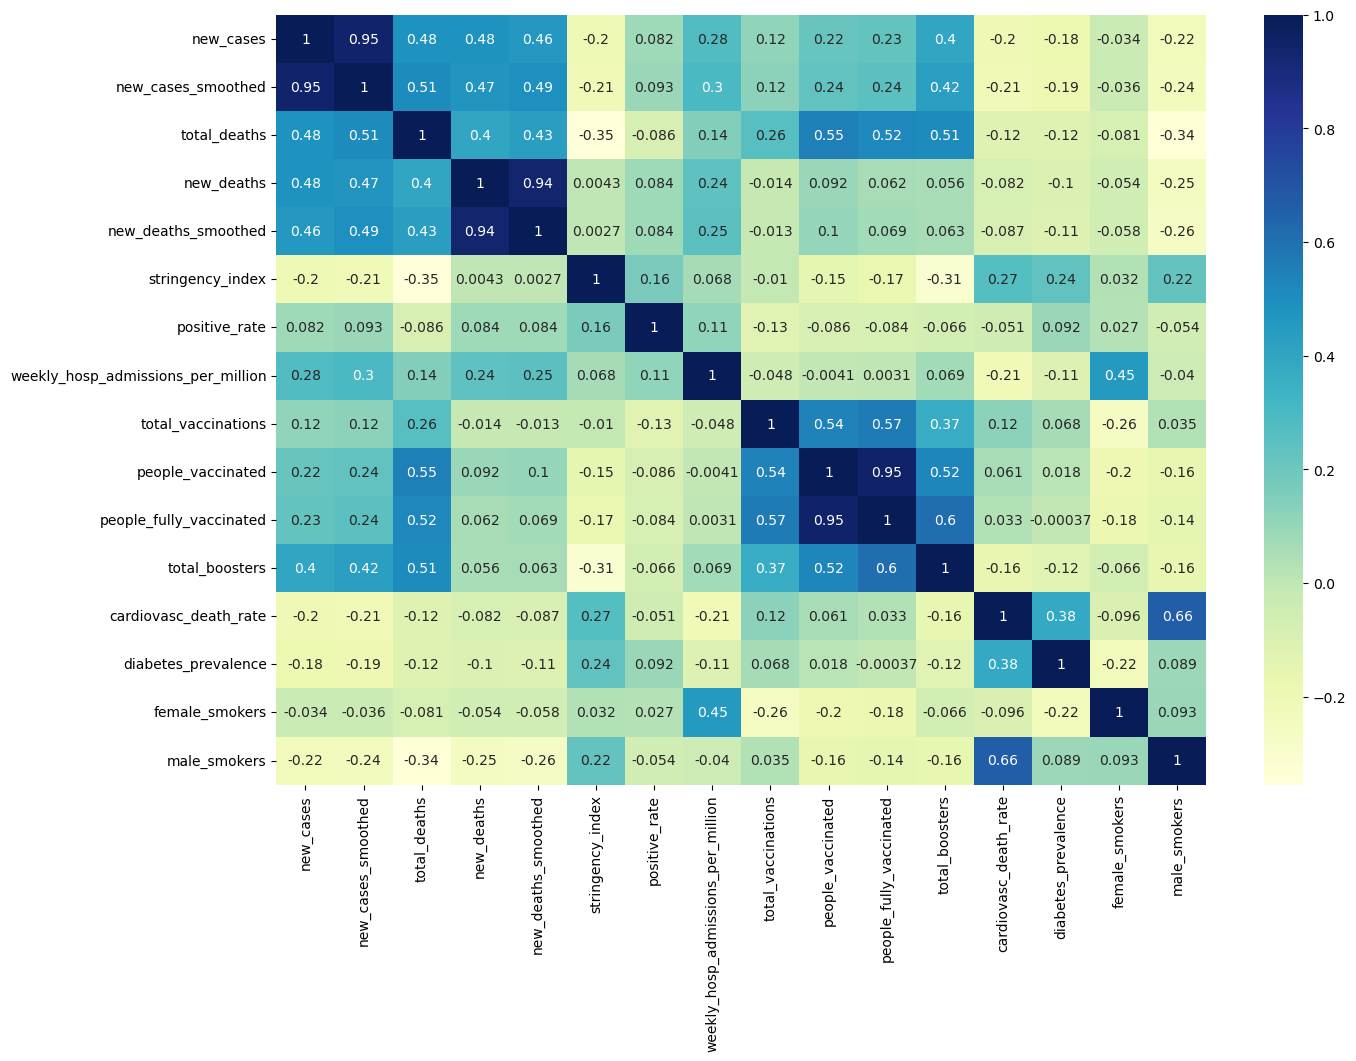

In [17]:
# Heatmap with only population variables

corr_vars = covid_data[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'stringency_index', 'positive_rate', 'weekly_hosp_admissions_per_million','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']]

f, ax1 = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_vars.iloc[:, 1:].corr(), annot=True, cmap="YlGnBu")

Lastly, a heat map was created to see the correlations between various factors in the dataset. 

New deaths smoothed and weekly hospital admissions per million have a correlation of 0.25, total deaths and total vaccinations have a correlation of 0.55.
Interestingly we also observe a -0.21 correlation value for the government stringency index and new cases smoothed.

By using these visualizations, we are able to better answer the Guiding Question to see if government policies like mandating vaccinations had an impact on the severity of COVID-19 across the G20 countries.


# Conclusions

By way of analyzing the COVID-19 data for G20 countries, while focussing on cases, deaths, vaccination, and booster rates. When exploring the data, key findings include: 

* Brazil is the country thhat reportedly has the most deaths as a result of COVID-19.
* South America, Europe & the USA had the most deaths when organized by continents. This makes sense as the top 3 G20 countries with the highest deaths were Brazil, Italy, and the USA.
* While Japan and South Korea have the highest amount of new vaccinations (smoothed per million) and they have a very low death rate, Japan is very low for booster-shots.
* South America had the highest number of deaths and also the highest number of new vaccinations per million.
* Europe is the continent that has the highest booster-rate shot out of all the continents.
* When analyzing North America's deaths and vaccinations, it follows very closely the times of when COVID waves occured and when lockdown measures were implemented (an element of the stringency index).
* Looking at only Canada, the vaccination rates increased significantly at March 2021, when the first vaccine became authorized in Canada and later goes to peak in May 2021 when the remaining brands became available.
* For Canada, booster-shot rates are lower than normal vaccination rates, and are more of a plateau with stable growth and declines, as opposed to the volatility of vaccination rates which show a much wider fluctuation.
* COVID-Test rates for Canada are higher than the number of cases and deaths. We see the spike in tests as soon as testing centres opened up and another spike when at-home test kits were made available.
* The rate of being fully vaccinated in Canada was not recorded until at least June 2021, which may be due to the government policies (as they pertain to the stringency index) on those who were not vaccinated or partially vaccinated.
* There is a 0.16 correlation between stringency index and the COVID positive rate, which is not overly significant, but it is the highest for the stringency index column. 

There are limitations to using the COVID dataset for the G20 countries due to possible under-reporting and reporting errors. Despite this, the above general trends prevail. Though there is no strong correlation between the columns, as seen by the heat map, we can see that in North America, 